In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from IPython.display import Image, display

In [2]:
FPL_URL = "https://fantasy.premierleague.com/api/bootstrap-static/"

In [3]:
req = requests.get(FPL_URL)

In [4]:
res_json = req.json()

In [5]:
res_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
elements_df = pd.DataFrame(res_json["elements"])
elements_types_df = pd.DataFrame(res_json["element_types"])
teams_df = pd.DataFrame(res_json["teams"])

In [7]:
elements_df.head()

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,0,11,NaN,NaN,0,80201,NaN,,0,...,45,1,1993,1993,19643,19643,0.2,0.2,Leno,0
1,0,0,0,NaN,NaN,0,115918,NaN,,0,...,10,0,4569,4569,2246,2246,0.0,0.0,Rúnarsson,0
2,0,0,0,NaN,NaN,0,47431,4.0,,-1,...,222,0,612,612,5274,5274,0.0,0.0,Willian,0
3,0,0,0,25.0,25.0,0,54694,NaN,,-1,...,73,0,817,817,74430,74430,0.0,0.0,Aubameyang,0
4,0,0,0,NaN,NaN,0,58822,NaN,,0,...,90,0,453,453,2639,2639,0.0,0.0,Cédric,0


In [8]:
elements_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'creativity', 'creativity_rank', 'creativity_rank_type',
       'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank',
       'ict_index_rank_type', 'id', 'in_dreamteam', 'influence',
       'influence_rank', 'influence_rank_type', 'minutes', 'news',
       'news_added', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'penalties_text', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_

In [9]:
slim_elements_df = elements_df[[
    'second_name','team','code','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points','photo'
]]

In [10]:
slim_elements_df.rename(columns={'code':'player_code'}, inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
slim_elements_df.head()

,second_name,team,player_code,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,photo
0,Leno,1,80201,1,2.1,50,90,1993,0.2,1,80201.jpg
1,Rúnarsson,1,115918,1,1.5,40,0,4569,0.0,0,115918.jpg
2,Borges Da Silva,1,47431,3,0.3,64,0,612,0.0,0,47431.jpg
3,Aubameyang,1,54694,4,1.8,99,0,817,0.0,0,54694.jpg
4,Soares,1,58822,2,0.2,45,0,453,0.0,0,58822.jpg


In [12]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
slim_elements_df.head()

,second_name,team,player_code,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,photo,position
0,Leno,1,80201,1,2.1,50,90,1993,0.2,1,80201.jpg,Goalkeeper
1,Rúnarsson,1,115918,1,1.5,40,0,4569,0.0,0,115918.jpg,Goalkeeper
2,Borges Da Silva,1,47431,3,0.3,64,0,612,0.0,0,47431.jpg,Midfielder
3,Aubameyang,1,54694,4,1.8,99,0,817,0.0,0,54694.jpg,Forward
4,Soares,1,58822,2,0.2,45,0,453,0.0,0,58822.jpg,Defender


In [14]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
slim_elements_df.head()

,second_name,team,player_code,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,photo,position
0,Leno,Arsenal,80201,1,2.1,50,90,1993,0.2,1,80201.jpg,Goalkeeper
1,Rúnarsson,Arsenal,115918,1,1.5,40,0,4569,0.0,0,115918.jpg,Goalkeeper
2,Borges Da Silva,Arsenal,47431,3,0.3,64,0,612,0.0,0,47431.jpg,Midfielder
3,Aubameyang,Arsenal,54694,4,1.8,99,0,817,0.0,0,54694.jpg,Forward
4,Soares,Arsenal,58822,2,0.2,45,0,453,0.0,0,58822.jpg,Defender


In [16]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
slim_elements_df.now_cost = slim_elements_df.now_cost / 10

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
slim_elements_df = slim_elements_df.drop(columns=['value_season', 'minutes', 'transfers_in', 'element_type', 'selected_by_percent'])

In [19]:
slim_elements_df.head()

,second_name,team,player_code,now_cost,total_points,photo,position,value
0,Leno,Arsenal,80201,5.0,1,80201.jpg,Goalkeeper,0.2
1,Rúnarsson,Arsenal,115918,4.0,0,115918.jpg,Goalkeeper,0.0
2,Borges Da Silva,Arsenal,47431,6.4,0,47431.jpg,Midfielder,0.0
3,Aubameyang,Arsenal,54694,9.9,0,54694.jpg,Forward,0.0
4,Soares,Arsenal,58822,4.5,0,58822.jpg,Defender,0.0


In [20]:
slim_elements_df.sort_values('value', ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
170,Chalobah,Chelsea,180736,5.0,14,180736.jpg,Defender,2.8
147,Alonso,Chelsea,82263,5.5,15,82263.jpg,Defender,2.7
77,Pinnock,Brentford,231065,4.5,11,231065.jpg,Defender,2.4
495,Dennis,Watford,230251,5.0,12,230251.jpg,Forward,2.4
234,Barbosa Pereira,Leicester,111931,5.5,12,111931.jpg,Defender,2.2
333,Pogba,Man Utd,74208,7.6,16,74208.jpg,Midfielder,2.1
515,Benrahma,West Ham,172841,6.0,12,172841.jpg,Midfielder,2.0
67,Canós,Brentford,174932,5.5,11,174932.jpg,Midfielder,2.0
66,Raya Martin,Brentford,154561,4.5,8,154561.jpg,Goalkeeper,1.8
438,Lloris,Spurs,37915,5.5,10,37915.jpg,Goalkeeper,1.8


In [21]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
3,Midfielder,0.292275
0,Defender,0.273684
1,Forward,0.253333
2,Goalkeeper,0.242105


In [22]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [23]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,0.690000
0,Defender,0.609302
3,Midfielder,0.527907
1,Forward,0.527778


In [24]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
2,Brentford,1.021429
5,Chelsea,1.014286
16,Spurs,0.850000
9,Leicester,0.835714
10,Liverpool,0.800000
12,Man Utd,0.700000
18,West Ham,0.657143
7,Everton,0.614286
13,Newcastle,0.600000
17,Watford,0.592857


In [25]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

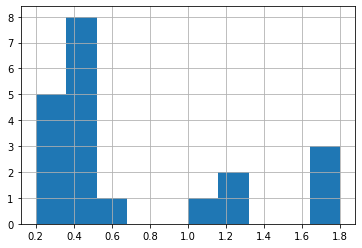

In [26]:
goal_df.value.hist()
plt.show()

In [27]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
227,Schmeichel,Leicester,17745,5.0,9,17745.jpg,Goalkeeper,1.8
66,Raya Martin,Brentford,154561,4.5,8,154561.jpg,Goalkeeper,1.8
438,Lloris,Spurs,37915,5.5,10,37915.jpg,Goalkeeper,1.8
382,Woodman,Newcastle,155503,4.5,6,155503.jpg,Goalkeeper,1.3
287,Ramses Becker,Liverpool,116535,6.0,7,116535.jpg,Goalkeeper,1.2
168,Mendy,Chelsea,228286,6.0,6,228286.jpg,Goalkeeper,1.0
550,Malheiro de Sá,Wolves,149065,5.0,3,149065.jpg,Goalkeeper,0.6
207,Pickford,Everton,111234,5.0,2,111234.jpg,Goalkeeper,0.4
174,Guaita,Crystal Palace,40836,4.5,2,40836.jpg,Goalkeeper,0.4
34,Martínez,Aston Villa,98980,5.5,2,98980.jpg,Goalkeeper,0.4


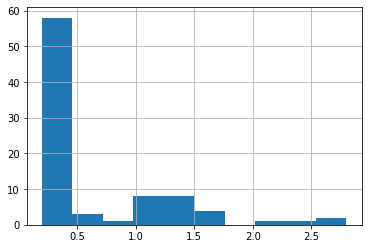

In [28]:
def_df.value.hist()
plt.show()

In [29]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
170,Chalobah,Chelsea,180736,5.0,14,180736.jpg,Defender,2.8
147,Alonso,Chelsea,82263,5.5,15,82263.jpg,Defender,2.7
77,Pinnock,Brentford,231065,4.5,11,231065.jpg,Defender,2.4
234,Barbosa Pereira,Leicester,111931,5.5,12,111931.jpg,Defender,2.2
446,Dier,Spurs,93264,4.5,7,93264.jpg,Defender,1.6
246,Thomas,Leicester,244619,4.5,7,244619.jpg,Defender,1.6
301,Tsimikas,Liverpool,214285,4.1,6,214285.jpg,Defender,1.5
235,Amartey,Leicester,155569,4.0,6,155569.jpg,Defender,1.5
455,Reguilón,Spurs,199249,5.0,7,199249.jpg,Defender,1.4
158,Christensen,Chelsea,135363,5.0,7,135363.jpg,Defender,1.4


In [30]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
333,Pogba,Man Utd,74208,7.6,16,74208.jpg,Midfielder,2.1
67,Canós,Brentford,174932,5.5,11,174932.jpg,Midfielder,2.0
515,Benrahma,West Ham,172841,6.0,12,172841.jpg,Midfielder,2.0
338,Borges Fernandes,Man Utd,141746,12.1,20,141746.jpg,Midfielder,1.7
109,Mac Allister,Brighton,243016,5.5,9,243016.jpg,Midfielder,1.6
63,Nørgaard,Brentford,128295,5.0,8,128295.jpg,Midfielder,1.6
488,Sarr,Watford,232185,6.0,9,232185.jpg,Midfielder,1.5
210,Doucouré,Everton,121599,5.5,8,121599.jpg,Midfielder,1.5
372,Murphy,Newcastle,114243,5.0,7,114243.jpg,Midfielder,1.4
335,Rodrigues de Paula Santos,Man Utd,101582,5.0,7,101582.jpg,Midfielder,1.4


In [31]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
495,Dennis,Watford,230251,5.0,12,230251.jpg,Forward,2.4
509,Antonio,West Ham,57531,7.6,13,57531.jpg,Forward,1.7
217,de Andrade,Everton,212319,7.6,11,212319.jpg,Forward,1.4
500,Hernández Suárez,Watford,244716,5.0,6,244716.jpg,Forward,1.2
435,Armstrong,Southampton,155511,6.0,6,155511.jpg,Forward,1.0
57,Ings,Aston Villa,84939,8.0,7,84939.jpg,Forward,0.9
214,Calvert-Lewin,Everton,177815,8.0,7,177815.jpg,Forward,0.9
375,Saint-Maximin,Newcastle,170137,6.5,6,170137.jpg,Forward,0.9
99,Maupay,Brighton,115382,6.5,5,115382.jpg,Forward,0.8
284,Firmino,Liverpool,92217,9.0,7,92217.jpg,Forward,0.8


In [32]:
liverpool_df = slim_elements_df.loc[slim_elements_df.team == 'Liverpool']

In [33]:
liverpool_df.sort_values('value',ascending=False).head(20)

,second_name,team,player_code,now_cost,total_points,photo,position,value
301,Tsimikas,Liverpool,214285,4.1,6,214285.jpg,Defender,1.5
289,Salah,Liverpool,118748,12.5,17,118748.jpg,Midfielder,1.4
280,Matip,Liverpool,60914,5.0,6,60914.jpg,Defender,1.2
287,Ramses Becker,Liverpool,116535,6.0,7,116535.jpg,Goalkeeper,1.2
285,van Dijk,Liverpool,97032,6.5,7,97032.jpg,Defender,1.1
296,Jota,Liverpool,194634,7.5,8,194634.jpg,Midfielder,1.1
284,Firmino,Liverpool,92217,9.0,7,92217.jpg,Forward,0.8
293,Alexander-Arnold,Liverpool,169187,7.5,6,169187.jpg,Defender,0.8
295,Keita,Liverpool,175592,5.0,3,175592.jpg,Midfielder,0.6
283,Oxlade-Chamberlain,Liverpool,81880,6.0,3,81880.jpg,Midfielder,0.5


In [34]:
def get_players_from_team(team_name):
    return slim_elements_df.loc[slim_elements_df.team == team_name]

In [35]:
def get_player(player_code):
    return slim_elements_df.loc[slim_elements_df.player_code == player_code]

In [142]:
def get_player_picture(player_code, display_picture=False):
    player = get_player(player_code)
    photo_id = player.photo.item().replace('.jpg', '') # Move to top
    res = requests.get(f'https://resources.premierleague.com/premierleague/photos/players/110x140/p{photo_id}.png')
    content = res.content
    if display_picture:
        display(Image(content))
    return content

In [143]:
liverpool_df = get_players_from_team('Liverpool')

In [144]:
liverpool_df

,second_name,team,player_code,now_cost,total_points,photo,position,value
277,Milner,Liverpool,15157,5.0,2,15157.jpg,Midfielder,0.4
280,Matip,Liverpool,60914,5.0,6,60914.jpg,Defender,1.2
283,Oxlade-Chamberlain,Liverpool,81880,6.0,3,81880.jpg,Midfielder,0.5
284,Firmino,Liverpool,92217,9.0,7,92217.jpg,Forward,0.8
285,van Dijk,Liverpool,97032,6.5,7,97032.jpg,Defender,1.1
286,Mané,Liverpool,110979,12.0,3,110979.jpg,Midfielder,0.2
287,Ramses Becker,Liverpool,116535,6.0,7,116535.jpg,Goalkeeper,1.2
288,Tavares,Liverpool,116643,5.5,1,116643.jpg,Midfielder,0.2
289,Salah,Liverpool,118748,12.5,17,118748.jpg,Midfielder,1.4
293,Alexander-Arnold,Liverpool,169187,7.5,6,169187.jpg,Defender,0.8


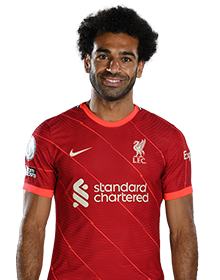

In [145]:
player_code = 118748
player_pic = get_player_picture(player_code=player_code, display_picture=True)

In [146]:
slim_elements_df.to_csv('./fpl_data.csv')

In [147]:
class Player:
    def __init__(self, player_code):
        self.player_code = player_code
    
    @property
    def total_points(self):
        pass
    
    @property
    def cost(self):
        pass
    
    @property
    def team(self):
        pass

    def __str__(self):
        pass

In [148]:
slim_elements_df_sorted = slim_elements_df.sort_values('value', ascending=False).reset_index(drop=True)
slim_elements_df_sorted

,second_name,team,player_code,now_cost,total_points,photo,position,value
0,Chalobah,Chelsea,180736,5.0,14,180736.jpg,Defender,2.8
1,Alonso,Chelsea,82263,5.5,15,82263.jpg,Defender,2.7
2,Pinnock,Brentford,231065,4.5,11,231065.jpg,Defender,2.4
3,Dennis,Watford,230251,5.0,12,230251.jpg,Forward,2.4
4,Barbosa Pereira,Leicester,111931,5.5,12,111931.jpg,Defender,2.2
5,Pogba,Man Utd,74208,7.6,16,74208.jpg,Midfielder,2.1
6,Benrahma,West Ham,172841,6.0,12,172841.jpg,Midfielder,2.0
7,Canós,Brentford,174932,5.5,11,174932.jpg,Midfielder,2.0
8,Lloris,Spurs,37915,5.5,10,37915.jpg,Goalkeeper,1.8
9,Schmeichel,Leicester,17745,5.0,9,17745.jpg,Goalkeeper,1.8


In [159]:
position_counts = {
    'Goalkeeper': 2,
    'Defender': 5,
    'Midfielder': 5,
    'Forward': 3
}

In [160]:
def calculate_best_value_team():
    positions = {
        'Goalkeeper': [],
        'Defender': [],
        'Midfielder': [],
        'Forward': []
    }
    total_cost = 100
    team_count = 0
    for row_idx, row in slim_elements_df_sorted.iterrows():
        position = row['position']
        new_cost = total_cost - row['now_cost']
        if new_cost < 0:
            continue
        if len(positions[position]) < position_counts[position] and total_cost > 0:
            positions[position].append(row_idx)
            total_cost -= row['now_cost']
            team_count += 1
        if team_count == 15:
            break
    return positions

In [161]:
best_value_team = calculate_best_value_team()
print(best_value_team)

{'Goalkeeper': [8, 9], 'Defender': [0, 1, 2, 4, 13], 'Midfielder': [5, 6, 7, 11, 14], 'Forward': [3, 12, 23]}


In [164]:
def print_team(team):
    print('Goalkeepers\n', "-" * 20, sep='')
    for player_code in team['Goalkeeper']:
        player = slim_elements_df_sorted.iloc[player_code]
        print(player['second_name'], 'value:', player['value'])
        get_player_picture(player_code=player['player_code'], display_picture=True)
    print("-" * 20)
    print('Defenders\n', "-" * 20, sep='')
    for player_code in team['Defender']:
        player = slim_elements_df_sorted.iloc[player_code]
        print(player['second_name'], 'value:', player['value'])
        get_player_picture(player_code=player['player_code'], display_picture=True)
    print("-" * 20)
    print('Midfielders\n', "-" * 20, sep='')
    for player_code in team['Midfielder']:
        player = slim_elements_df_sorted.iloc[player_code]
        print(player['second_name'], 'value:', player['value'])
        get_player_picture(player_code=player['player_code'], display_picture=True)
    print("-" * 20)
    print('Forwards\n', "-" * 20, sep='')
    for player_code in team['Forward']:
        player = slim_elements_df_sorted.iloc[player_code]
        print(player['second_name'], 'value:', player['value'])
        get_player_picture(player_code=player['player_code'], display_picture=True)

Goalkeepers
--------------------
Lloris value: 1.8


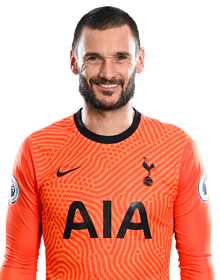

Schmeichel value: 1.8


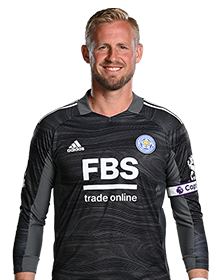

--------------------
Defenders
--------------------
Chalobah value: 2.8


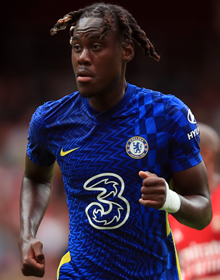

Alonso value: 2.7


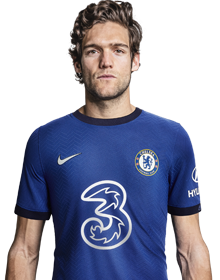

Pinnock value: 2.4


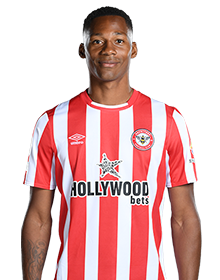

Barbosa Pereira value: 2.2


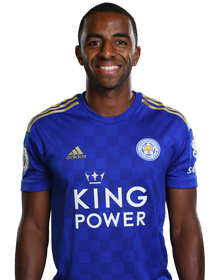

Dier value: 1.6


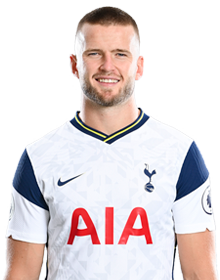

--------------------
Midfielders
--------------------
Pogba value: 2.1


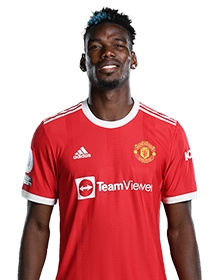

Benrahma value: 2.0


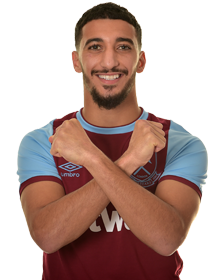

Canós value: 2.0


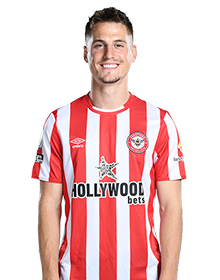

Borges Fernandes value: 1.7


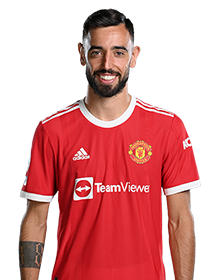

Mac Allister value: 1.6


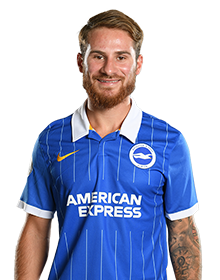

--------------------
Forwards
--------------------
Dennis value: 2.4


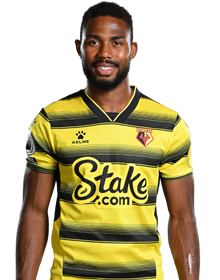

Antonio value: 1.7


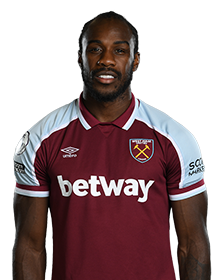

de Andrade value: 1.4


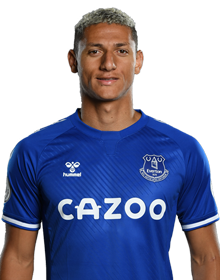

In [165]:
print_team(best_value_team)

In [ ]:
#              gk
#         df.  df.  df
#     mf.   mf.   mf.   mf.  
#        fwd. fwd. fwd

In [ ]:
# Ideas:
# How difficult is the next fixture?
# Is the player 'on form'?
# Predicted points
# Expected goals
# Expected clean sheet
# Identify optimal player to select as captain based on predicted points
# Identify 1 optimal transfer to make each week
# Does the player often perform in this fixture?
# Does the player often perform at home/away?
# Are they available for the next game (no injury, suspension, transferred away etc)
#   If someone is injured, need to transfer those guys out
# Make the transfer 1 hour before deadline